In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns #for plotting
from sklearn.ensemble import RandomForestClassifier #for the model
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz #plot tree
from sklearn.metrics import roc_curve, auc #for model evaluation
from sklearn.metrics import classification_report #for model evaluation
from sklearn.metrics import confusion_matrix #for model evaluation
from sklearn.model_selection import train_test_split #for data splitting
np.random.seed(1) #ensure reproducibility

pd.options.mode.chained_assignment = None  #hide any pandas warnings

In [2]:
# This file cleans LIFT_registry_UCMerged and LIFT_boardings in order to create flame_boardings.csv

In [3]:
import pandas as pd
import numpy as np
import dame_flame
import random
import matplotlib.pyplot as plt

In [11]:
LIFT_reg = pd.read_csv("/Users/JennyH/cisil-causal-inference/Data/LIFT_registry_UCMerged.csv")
LIFT_reg

,Unnamed: 0,Age,RaceDesc,LanguageSpoken,Expiration,DateIssued,CardIssuingAgency,FIPS,Initial Load,Study Card,...,OverallJobAccess_quantileNum_4q,lowwagelaborforce_quantileNum_4q,Access30Transit_quantileNum_4q,Access30Transit_ts_quantileNum_4q,spatialmismatch_quantileNum_4q,OverallJobAccess_quantileNum_10q,lowwagelaborforce_quantileNum_10q,Access30Transit_quantileNum_10q,Access30Transit_ts_quantileNum_10q,spatialmismatch_quantileNum_10q
0,0,40,Asian,English,8/31/2023,2021-09-28,CCS,530330092002,Subsidized Annual Pass,NaN,...,3,3,3,3,2,8,8,9,9,5
1,1,51,Black or African American,English,8/31/2023,2021-10-19,CCS,530330092002,Subsidized Annual Pass,NaN,...,3,3,3,3,2,8,8,9,9,5
2,2,42,Black or African American,English,4/30/2023,2021-04-29,HS Jail Health Services BA6586,530330092002,NaN,NaN,...,3,3,3,3,2,8,8,9,9,5
3,3,59,Black or African American,English,8/31/2023,2021-11-23,King County Public Health,530330092002,Subsidized Annual Pass,NaN,...,3,3,3,3,2,8,8,9,9,5
4,4,44,Hispanic or Latino,English,8/31/2023,2021-11-10,CCS,530330092002,Subsidized Annual Pass,NaN,...,3,3,3,3,2,8,8,9,9,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93655,93655,36,Asian,English,2/28/2021,2018-05-15,King County Public Health,530330322122,NaN,NaN,...,0,0,0,0,0,1,0,1,1,2
93656,93656,36,Other,English,2/28/2021,2018-05-15,King County Public Health,530330322122,NaN,NaN,...,0,0,0,0,0,1,0,1,1,2
93657,93657,26,Multi-Racial,English,7/31/2020,2018-06-11,CCS BA3628,530330322122,Monthly Pass,NaN,...,0,0,0,0,0,1,0,1,1,2
93658,93658,58,White,English,3/31/2020,2018-06-13,King County Public Health,530530724083,NaN,NaN,...,1,0,0,1,1,3,1,1,2,2


In [4]:
LIFT_reg_old = pd.read_csv("/Users/JennyH/cisil-causal-inference/Data/LIFT_registry_UCMerged.csv") # has 112525 rows
LIFT_reg_old

,Unnamed: 0,Age,RaceDesc,LanguageSpoken,Expiration,DateIssued,CardIssuingAgency,GEOID,Initial Load,Study Card,card_id,OverallJobAccess_D,lowwagelaborforce_D,Access30Transit_D,Access30Transit_ts_D,spatialmismatch_D
0,0,36,Black or African American,Other,8/31/2019,2017-06-15,KCMCCS,530330288022,NaN,NaN,568-1,4,3,1,1,2
1,1,31,White,English,12/31/2018,2017-05-04,Promo Account,530330288022,NaN,NaN,7672-1,4,3,1,1,2
2,2,33,White,English,3/31/2021,2019-04-08,WithinReach,530330288022,NaN,NaN,7672-2,4,3,1,1,2
3,3,33,White,English,8/31/2019,2017-06-27,KCMCCS,530330288022,NaN,NaN,7776-1,4,3,1,1,2
4,4,27,Black or African American,English,8/31/2019,2017-06-15,KCMCCS,530330288022,NaN,NaN,18544-1,4,3,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112520,112520,39,White,English,10/31/2024,2022-02-14,King County Public Health,530530723056,NaN,Subsidized Annual Pass,270140-1,2,1,1,1,1
112521,112521,40,White,English,11/30/2023,2022-02-17,DSHS - ORCA LIFT (remote enrollment),530530704041,10.0,NaN,270468-1,1,4,1,1,4
112522,112522,36,White,English,3/31/2025,2022-02-22,King County Public Health,530610417042,10.0,NaN,270632-1,3,4,3,3,4
112523,112523,40,White,English,10/31/2024,2022-03-04,DSHS - subsidized annual pass (remote enrollment),530530723101,NaN,Subsidized Annual Pass,271502-1,2,2,4,3,2


In [12]:
print(len(LIFT_reg.query("Access30Transit_quantileNum_4q == 0")))
print(len(LIFT_reg.query("Access30Transit_quantileNum_4q == 1")))
len(LIFT_reg.query("Access30Transit_quantileNum_4q == 2"))
len(LIFT_reg.query("Access30Transit_quantileNum_4q == 3"))

23535
23358


23242

In [13]:
LIFT_reg.columns = [c.replace(' ', '_') for c in LIFT_reg.columns]

In [14]:
LIFT_reg['DateIssued'] = pd.to_datetime(LIFT_reg['DateIssued'])

In [15]:
# Filter for individuals who register after SAP program starts.
sap = LIFT_reg[(LIFT_reg.DateIssued >= "2020-10-01")]

In [16]:
sap["SAP"] = np.where(sap["Initial_Load"] == "Subsidized Annual Pass", 1, 0)
sap

<ipython-input-16-98350a0f2a2c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sap["SAP"] = np.where(sap["Initial_Load"] == "Subsidized Annual Pass", 1, 0)


,Unnamed:_0,Age,RaceDesc,LanguageSpoken,Expiration,DateIssued,CardIssuingAgency,FIPS,Initial_Load,Study_Card,...,lowwagelaborforce_quantileNum_4q,Access30Transit_quantileNum_4q,Access30Transit_ts_quantileNum_4q,spatialmismatch_quantileNum_4q,OverallJobAccess_quantileNum_10q,lowwagelaborforce_quantileNum_10q,Access30Transit_quantileNum_10q,Access30Transit_ts_quantileNum_10q,spatialmismatch_quantileNum_10q,SAP
0,0,40,Asian,English,8/31/2023,2021-09-28,CCS,530330092002,Subsidized Annual Pass,NaN,...,3,3,3,2,8,8,9,9,5,1
1,1,51,Black or African American,English,8/31/2023,2021-10-19,CCS,530330092002,Subsidized Annual Pass,NaN,...,3,3,3,2,8,8,9,9,5,1
2,2,42,Black or African American,English,4/30/2023,2021-04-29,HS Jail Health Services BA6586,530330092002,NaN,NaN,...,3,3,3,2,8,8,9,9,5,0
3,3,59,Black or African American,English,8/31/2023,2021-11-23,King County Public Health,530330092002,Subsidized Annual Pass,NaN,...,3,3,3,2,8,8,9,9,5,1
4,4,44,Hispanic or Latino,English,8/31/2023,2021-11-10,CCS,530330092002,Subsidized Annual Pass,NaN,...,3,3,3,2,8,8,9,9,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93559,93559,22,Black or African American,English,12/31/2022,2020-10-27,King County Public Health,530330220034,NaN,NaN,...,0,0,0,0,5,0,1,0,0,0
93563,93563,36,White,English,5/31/2023,2020-10-28,KCMCCS,530610526071,10,NaN,...,2,0,0,3,0,7,0,1,8,0
93572,93572,63,White,English,5/31/2023,2020-10-22,DSHS - ORCA LIFT (remote enrollment),530530730053,10,NaN,...,0,0,0,1,0,0,1,2,4,0
93598,93598,52,White,English,4/30/2023,2020-10-03,CCS,530330321021,10,NaN,...,0,0,0,1,0,1,1,2,3,0


In [17]:
sap["SAP"].value_counts()

0    17900
1     8173
Name: SAP, dtype: int64

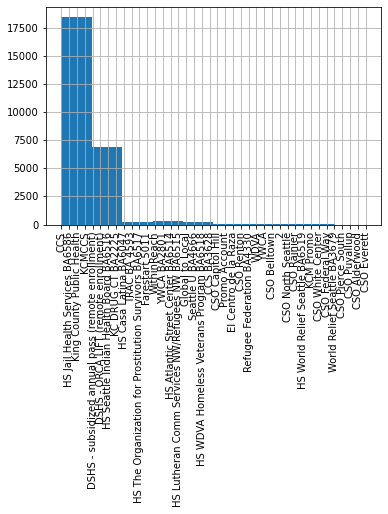

In [18]:
sap["CardIssuingAgency"].hist()
plt.xticks(rotation=90)
plt.show()

In [19]:
top5 = sap.value_counts("CardIssuingAgency").index[:5]
top5.tolist()

['King County Public Health',
 'DSHS - ORCA LIFT (remote enrollment)',
 'DSHS - subsidized annual pass (remote enrollment)',
 'CCS',
 'KCMCCS']

In [20]:
# Agency is the condensed version of CardIssuingAgency.
sap['Agency'] = (sap.CardIssuingAgency.
                          apply(lambda x: x 
                                if x in top5 
                                else "Other"))
sap

<ipython-input-20-0ed1d41df164>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sap['Agency'] = (sap.CardIssuingAgency.


,Unnamed:_0,Age,RaceDesc,LanguageSpoken,Expiration,DateIssued,CardIssuingAgency,FIPS,Initial_Load,Study_Card,...,Access30Transit_quantileNum_4q,Access30Transit_ts_quantileNum_4q,spatialmismatch_quantileNum_4q,OverallJobAccess_quantileNum_10q,lowwagelaborforce_quantileNum_10q,Access30Transit_quantileNum_10q,Access30Transit_ts_quantileNum_10q,spatialmismatch_quantileNum_10q,SAP,Agency
0,0,40,Asian,English,8/31/2023,2021-09-28,CCS,530330092002,Subsidized Annual Pass,NaN,...,3,3,2,8,8,9,9,5,1,CCS
1,1,51,Black or African American,English,8/31/2023,2021-10-19,CCS,530330092002,Subsidized Annual Pass,NaN,...,3,3,2,8,8,9,9,5,1,CCS
2,2,42,Black or African American,English,4/30/2023,2021-04-29,HS Jail Health Services BA6586,530330092002,NaN,NaN,...,3,3,2,8,8,9,9,5,0,Other
3,3,59,Black or African American,English,8/31/2023,2021-11-23,King County Public Health,530330092002,Subsidized Annual Pass,NaN,...,3,3,2,8,8,9,9,5,1,King County Public Health
4,4,44,Hispanic or Latino,English,8/31/2023,2021-11-10,CCS,530330092002,Subsidized Annual Pass,NaN,...,3,3,2,8,8,9,9,5,1,CCS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93559,93559,22,Black or African American,English,12/31/2022,2020-10-27,King County Public Health,530330220034,NaN,NaN,...,0,0,0,5,0,1,0,0,0,King County Public Health
93563,93563,36,White,English,5/31/2023,2020-10-28,KCMCCS,530610526071,10,NaN,...,0,0,3,0,7,0,1,8,0,KCMCCS
93572,93572,63,White,English,5/31/2023,2020-10-22,DSHS - ORCA LIFT (remote enrollment),530530730053,10,NaN,...,0,0,1,0,0,1,2,4,0,DSHS - ORCA LIFT (remote enrollment)
93598,93598,52,White,English,4/30/2023,2020-10-03,CCS,530330321021,10,NaN,...,0,0,1,0,1,1,2,3,0,CCS


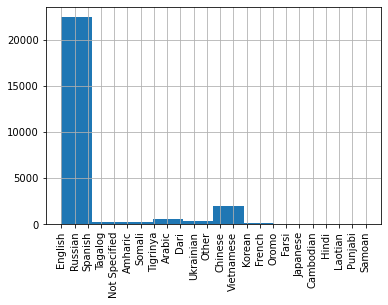

In [21]:
sap["LanguageSpoken"].hist()
plt.xticks(rotation=90)
plt.show()

In [22]:
sap["LanguageSpoken"].value_counts()

English          20754
Chinese           1631
Spanish           1499
Dari               402
Other              353
Vietnamese         310
Amharic            184
Not Specified      177
Russian            164
Tigrinya           124
Somali              73
Farsi               65
Korean              57
Ukrainian           52
Arabic              46
French              46
Tagalog             37
Oromo               13
Cambodian           12
Punjabi             12
Japanese             6
Hindi                5
Laotian              3
Samoan               3
Name: LanguageSpoken, dtype: int64

In [52]:
top10 = sap.value_counts("LanguageSpoken").index[:5]
top10.tolist()

['English', 'Chinese', 'Spanish', 'Dari', 'Other']

In [53]:
# Language is the condensed version of LanguageSpoken.
sap['Language'] = (sap.LanguageSpoken.
                          apply(lambda x: x 
                                if x in top10 
                                else "Other"))
sap

,Unnamed:_0,Age,RaceDesc,LanguageSpoken,Expiration,DateIssued,CardIssuingAgency,FIPS,Initial_Load,Study_Card,...,Access30Transit_ts_quantileNum_4q,spatialmismatch_quantileNum_4q,OverallJobAccess_quantileNum_10q,lowwagelaborforce_quantileNum_10q,Access30Transit_quantileNum_10q,Access30Transit_ts_quantileNum_10q,spatialmismatch_quantileNum_10q,SAP,Agency,Language
0,0,40,Asian,English,8/31/2023,2021-09-28,CCS,530330092002,Subsidized Annual Pass,NaN,...,3,2,8,8,9,9,5,1,CCS,English
1,1,51,Black or African American,English,8/31/2023,2021-10-19,CCS,530330092002,Subsidized Annual Pass,NaN,...,3,2,8,8,9,9,5,1,CCS,English
2,2,42,Black or African American,English,4/30/2023,2021-04-29,HS Jail Health Services BA6586,530330092002,NaN,NaN,...,3,2,8,8,9,9,5,0,Other,English
3,3,59,Black or African American,English,8/31/2023,2021-11-23,King County Public Health,530330092002,Subsidized Annual Pass,NaN,...,3,2,8,8,9,9,5,1,King County Public Health,English
4,4,44,Hispanic or Latino,English,8/31/2023,2021-11-10,CCS,530330092002,Subsidized Annual Pass,NaN,...,3,2,8,8,9,9,5,1,CCS,English
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93559,93559,22,Black or African American,English,12/31/2022,2020-10-27,King County Public Health,530330220034,NaN,NaN,...,0,0,5,0,1,0,0,0,King County Public Health,English
93563,93563,36,White,English,5/31/2023,2020-10-28,KCMCCS,530610526071,10,NaN,...,0,3,0,7,0,1,8,0,KCMCCS,English
93572,93572,63,White,English,5/31/2023,2020-10-22,DSHS - ORCA LIFT (remote enrollment),530530730053,10,NaN,...,0,1,0,0,1,2,4,0,DSHS - ORCA LIFT (remote enrollment),English
93598,93598,52,White,English,4/30/2023,2020-10-03,CCS,530330321021,10,NaN,...,0,1,0,1,1,2,3,0,CCS,English


In [54]:
# split into user id and card number
sap[['user_id', 'stage']] = sap['card_id'].str.split('-', expand=True)

In [55]:
# bin all continuous variables.
sap['Age_bin']=pd.cut(x = sap['Age'],
                        bins = [0,25,35,45,55,65,200], 
                        labels = [0,1,2,3,4,5])

# sap.drop(columns=['RaceDesc','LanguageSpoken', 'CardIssuingAgency'],inplace=True)

In [56]:
sap # 4.7: 29878 rows

,Unnamed:_0,Age,RaceDesc,LanguageSpoken,Expiration,DateIssued,CardIssuingAgency,FIPS,Initial_Load,Study_Card,...,OverallJobAccess_quantileNum_10q,lowwagelaborforce_quantileNum_10q,Access30Transit_quantileNum_10q,Access30Transit_ts_quantileNum_10q,spatialmismatch_quantileNum_10q,SAP,Agency,Language,user_id,Age_bin
0,0,40,Asian,English,8/31/2023,2021-09-28,CCS,530330092002,Subsidized Annual Pass,NaN,...,8,8,9,9,5,1,CCS,English,61080,2
1,1,51,Black or African American,English,8/31/2023,2021-10-19,CCS,530330092002,Subsidized Annual Pass,NaN,...,8,8,9,9,5,1,CCS,English,107444,3
2,2,42,Black or African American,English,4/30/2023,2021-04-29,HS Jail Health Services BA6586,530330092002,NaN,NaN,...,8,8,9,9,5,0,Other,English,57528,2
3,3,59,Black or African American,English,8/31/2023,2021-11-23,King County Public Health,530330092002,Subsidized Annual Pass,NaN,...,8,8,9,9,5,1,King County Public Health,English,10168,4
4,4,44,Hispanic or Latino,English,8/31/2023,2021-11-10,CCS,530330092002,Subsidized Annual Pass,NaN,...,8,8,9,9,5,1,CCS,English,172698,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93559,93559,22,Black or African American,English,12/31/2022,2020-10-27,King County Public Health,530330220034,NaN,NaN,...,5,0,1,0,0,0,King County Public Health,English,237038,0
93563,93563,36,White,English,5/31/2023,2020-10-28,KCMCCS,530610526071,10,NaN,...,0,7,0,1,8,0,KCMCCS,English,237256,2
93572,93572,63,White,English,5/31/2023,2020-10-22,DSHS - ORCA LIFT (remote enrollment),530530730053,10,NaN,...,0,0,1,2,4,0,DSHS - ORCA LIFT (remote enrollment),English,236550,4
93598,93598,52,White,English,4/30/2023,2020-10-03,CCS,530330321021,10,NaN,...,0,1,1,2,3,0,CCS,English,39120,3


In [57]:
registry = sap.loc[:, ~sap.columns.isin(['Initial_Load', 'Study_Card', 'GEOID','Unnamed:_0','Expiration','LanguageSpoken','Age','CardIssuingAgency'])]
registry # 17393 rows

,RaceDesc,DateIssued,FIPS,duplicate,card_id,stage,id,OverallJobAccess,lowwagelaborforce,Access30Transit,...,OverallJobAccess_quantileNum_10q,lowwagelaborforce_quantileNum_10q,Access30Transit_quantileNum_10q,Access30Transit_ts_quantileNum_10q,spatialmismatch_quantileNum_10q,SAP,Agency,Language,user_id,Age_bin
0,Asian,2021-09-28,530330092002,False,61080-8,8,61080,2.245899,708,1.487184,...,8,8,9,9,5,1,CCS,English,61080,2
1,Black or African American,2021-10-19,530330092002,False,107444-6,6,107444,2.245899,708,1.487184,...,8,8,9,9,5,1,CCS,English,107444,3
2,Black or African American,2021-04-29,530330092002,False,57528-6,6,57528,2.245899,708,1.487184,...,8,8,9,9,5,0,Other,English,57528,2
3,Black or African American,2021-11-23,530330092002,False,10168-5,5,10168,2.245899,708,1.487184,...,8,8,9,9,5,1,King County Public Health,English,10168,4
4,Hispanic or Latino,2021-11-10,530330092002,False,172698-5,5,172698,2.245899,708,1.487184,...,8,8,9,9,5,1,CCS,English,172698,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93559,Black or African American,2020-10-27,530330220034,False,237038-1,1,237038,1.456875,174,0.017855,...,5,0,1,0,0,0,King County Public Health,English,237038,0
93563,White,2020-10-28,530610526071,False,237256-1,1,237256,0.472162,493,0.001867,...,0,7,0,1,8,0,KCMCCS,English,237256,2
93572,White,2020-10-22,530530730053,False,236550-1,1,236550,0.229570,231,0.004476,...,0,0,1,2,4,0,DSHS - ORCA LIFT (remote enrollment),English,236550,4
93598,White,2020-10-03,530330321021,False,39120-1,1,39120,0.400939,239,0.005537,...,0,1,1,2,3,0,CCS,English,39120,3


## Merge Ridership Data

In [58]:
# Combine the Response-variable (sales) with the features (registry).
boardings = pd.read_csv("/Users/JennyH/cisil-causal-inference/Data/LIFT_boardings.csv")
boardings_cont = pd.read_csv("/Users/JennyH/cisil-causal-inference/Data/LIFT_boardings_2021-11-01_to_2022-03-06.csv")

In [59]:
boardings

,week,Community Transit,Everett Transit,King County Metro,Kitsap Transit,Pierce Transit,Sound Transit,card_id
0,2017-03-12,NaN,NaN,8.0,NaN,NaN,NaN,94262-1
1,2017-03-19,NaN,NaN,4.0,NaN,NaN,NaN,94262-1
2,2017-03-26,NaN,NaN,2.0,NaN,NaN,NaN,94262-1
3,2017-04-02,NaN,NaN,4.0,NaN,NaN,NaN,94262-1
4,2017-04-16,NaN,NaN,2.0,NaN,NaN,NaN,94262-1
...,...,...,...,...,...,...,...,...
1649411,2021-05-02,NaN,NaN,NaN,NaN,NaN,3.0,137082-2
1649412,2021-05-23,NaN,NaN,1.0,NaN,NaN,NaN,137082-2
1649413,2021-05-30,NaN,NaN,1.0,NaN,NaN,NaN,137082-2
1649414,2021-04-04,NaN,NaN,1.0,NaN,NaN,1.0,249966-1


In [60]:
LIFT_b = boardings.append(boardings_cont, ignore_index=True)
LIFT_b # 1783168 rows

,week,Community Transit,Everett Transit,King County Metro,Kitsap Transit,Pierce Transit,Sound Transit,card_id
0,2017-03-12,NaN,NaN,8.0,NaN,NaN,NaN,94262-1
1,2017-03-19,NaN,NaN,4.0,NaN,NaN,NaN,94262-1
2,2017-03-26,NaN,NaN,2.0,NaN,NaN,NaN,94262-1
3,2017-04-02,NaN,NaN,4.0,NaN,NaN,NaN,94262-1
4,2017-04-16,NaN,NaN,2.0,NaN,NaN,NaN,94262-1
...,...,...,...,...,...,...,...,...
1783163,2022-02-20,NaN,NaN,2.0,NaN,NaN,23.0,266802-2
1783164,2022-02-27,NaN,NaN,NaN,NaN,NaN,10.0,266802-2
1783165,2022-02-13,NaN,NaN,13.0,NaN,NaN,NaN,266132-2
1783166,2022-02-27,NaN,NaN,1.0,NaN,NaN,3.0,269496-1


In [61]:
# Select for boardings after 10/20/2020 + 6 months
LIFT_b = LIFT_b[(LIFT_b.week >= "2021-04-01")]
LIFT_b # 293294 rows

,week,Community Transit,Everett Transit,King County Metro,Kitsap Transit,Pierce Transit,Sound Transit,card_id
136977,2021-04-04,NaN,NaN,NaN,NaN,NaN,1.0,184062-1
137184,2021-04-04,NaN,NaN,7.0,NaN,NaN,2.0,179028-1
873921,2021-04-04,NaN,NaN,12.0,NaN,NaN,NaN,143128-1
873922,2021-04-11,NaN,NaN,6.0,NaN,NaN,NaN,143128-1
874412,2021-04-04,NaN,NaN,2.0,NaN,NaN,1.0,143330-1
...,...,...,...,...,...,...,...,...
1783163,2022-02-20,NaN,NaN,2.0,NaN,NaN,23.0,266802-2
1783164,2022-02-27,NaN,NaN,NaN,NaN,NaN,10.0,266802-2
1783165,2022-02-13,NaN,NaN,13.0,NaN,NaN,NaN,266132-2
1783166,2022-02-27,NaN,NaN,1.0,NaN,NaN,3.0,269496-1


In [62]:
# split into user id and card number
LIFT_b[['user_id', 'stage']] = LIFT_b['card_id'].str.split('-', expand=True)
LIFT_b

,week,Community Transit,Everett Transit,King County Metro,Kitsap Transit,Pierce Transit,Sound Transit,card_id,user_id,stage
136977,2021-04-04,NaN,NaN,NaN,NaN,NaN,1.0,184062-1,184062,1
137184,2021-04-04,NaN,NaN,7.0,NaN,NaN,2.0,179028-1,179028,1
873921,2021-04-04,NaN,NaN,12.0,NaN,NaN,NaN,143128-1,143128,1
873922,2021-04-11,NaN,NaN,6.0,NaN,NaN,NaN,143128-1,143128,1
874412,2021-04-04,NaN,NaN,2.0,NaN,NaN,1.0,143330-1,143330,1
...,...,...,...,...,...,...,...,...,...,...
1783163,2022-02-20,NaN,NaN,2.0,NaN,NaN,23.0,266802-2,266802,2
1783164,2022-02-27,NaN,NaN,NaN,NaN,NaN,10.0,266802-2,266802,2
1783165,2022-02-13,NaN,NaN,13.0,NaN,NaN,NaN,266132-2,266132,2
1783166,2022-02-27,NaN,NaN,1.0,NaN,NaN,3.0,269496-1,269496,1


In [63]:
# select for king county metro boardings
boardings = LIFT_b.loc[:, LIFT_b.columns.isin(['King County Metro', 'week', 'card_id', 'user_id'])]
boardings

,week,King County Metro,card_id,user_id
136977,2021-04-04,NaN,184062-1,184062
137184,2021-04-04,7.0,179028-1,179028
873921,2021-04-04,12.0,143128-1,143128
873922,2021-04-11,6.0,143128-1,143128
874412,2021-04-04,2.0,143330-1,143330
...,...,...,...,...
1783163,2022-02-20,2.0,266802-2,266802
1783164,2022-02-27,NaN,266802-2,266802
1783165,2022-02-13,13.0,266132-2,266132
1783166,2022-02-27,1.0,269496-1,269496


In [64]:
# drop the NA rows.
boardings = boardings[boardings['King County Metro'].notna()]
boardings

,week,King County Metro,card_id,user_id
137184,2021-04-04,7.0,179028-1,179028
873921,2021-04-04,12.0,143128-1,143128
873922,2021-04-11,6.0,143128-1,143128
874412,2021-04-04,2.0,143330-1,143330
874413,2021-04-11,6.0,143330-1,143330
...,...,...,...,...
1783161,2022-03-06,16.0,270794-1,270794
1783163,2022-02-20,2.0,266802-2,266802
1783165,2022-02-13,13.0,266132-2,266132
1783166,2022-02-27,1.0,269496-1,269496


In [65]:
# join on user_id, selecting only the weeks that are 6 months post-registration
merged = pd.merge(registry, boardings, how='left', on='card_id')
merged

,RaceDesc,DateIssued,FIPS,duplicate,card_id,stage,id,OverallJobAccess,lowwagelaborforce,Access30Transit,...,Access30Transit_ts_quantileNum_10q,spatialmismatch_quantileNum_10q,SAP,Agency,Language,user_id_x,Age_bin,week,King County Metro,user_id_y
0,Asian,2021-09-28,530330092002,False,61080-8,8,61080,2.245899,708,1.487184,...,9,5,1,CCS,English,61080,2,NaN,NaN,NaN
1,Black or African American,2021-10-19,530330092002,False,107444-6,6,107444,2.245899,708,1.487184,...,9,5,1,CCS,English,107444,3,NaN,NaN,NaN
2,Black or African American,2021-04-29,530330092002,False,57528-6,6,57528,2.245899,708,1.487184,...,9,5,0,Other,English,57528,2,2021-07-11,20.0,57528
3,Black or African American,2021-04-29,530330092002,False,57528-6,6,57528,2.245899,708,1.487184,...,9,5,0,Other,English,57528,2,2021-07-18,22.0,57528
4,Black or African American,2021-04-29,530330092002,False,57528-6,6,57528,2.245899,708,1.487184,...,9,5,0,Other,English,57528,2,2021-07-25,19.0,57528
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149711,Black or African American,2020-10-27,530330220034,False,237038-1,1,237038,1.456875,174,0.017855,...,0,0,0,King County Public Health,English,237038,0,2022-02-27,1.0,237038
149712,White,2020-10-28,530610526071,False,237256-1,1,237256,0.472162,493,0.001867,...,1,8,0,KCMCCS,English,237256,2,NaN,NaN,NaN
149713,White,2020-10-22,530530730053,False,236550-1,1,236550,0.229570,231,0.004476,...,2,4,0,DSHS - ORCA LIFT (remote enrollment),English,236550,4,NaN,NaN,NaN
149714,White,2020-10-03,530330321021,False,39120-1,1,39120,0.400939,239,0.005537,...,2,3,0,CCS,English,39120,3,NaN,NaN,NaN


In [66]:
# NA --> 0 for card_id's who never boarded after 6 months.
merged['King County Metro'] = merged['King County Metro'].replace(np.nan, 0)
merged['week'] = merged['week'].replace(np.nan, "2022-04-01") # placeholder for the na vals.
merged

,RaceDesc,DateIssued,FIPS,duplicate,card_id,stage,id,OverallJobAccess,lowwagelaborforce,Access30Transit,...,Access30Transit_ts_quantileNum_10q,spatialmismatch_quantileNum_10q,SAP,Agency,Language,user_id_x,Age_bin,week,King County Metro,user_id_y
0,Asian,2021-09-28,530330092002,False,61080-8,8,61080,2.245899,708,1.487184,...,9,5,1,CCS,English,61080,2,2022-04-01,0.0,NaN
1,Black or African American,2021-10-19,530330092002,False,107444-6,6,107444,2.245899,708,1.487184,...,9,5,1,CCS,English,107444,3,2022-04-01,0.0,NaN
2,Black or African American,2021-04-29,530330092002,False,57528-6,6,57528,2.245899,708,1.487184,...,9,5,0,Other,English,57528,2,2021-07-11,20.0,57528
3,Black or African American,2021-04-29,530330092002,False,57528-6,6,57528,2.245899,708,1.487184,...,9,5,0,Other,English,57528,2,2021-07-18,22.0,57528
4,Black or African American,2021-04-29,530330092002,False,57528-6,6,57528,2.245899,708,1.487184,...,9,5,0,Other,English,57528,2,2021-07-25,19.0,57528
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149711,Black or African American,2020-10-27,530330220034,False,237038-1,1,237038,1.456875,174,0.017855,...,0,0,0,King County Public Health,English,237038,0,2022-02-27,1.0,237038
149712,White,2020-10-28,530610526071,False,237256-1,1,237256,0.472162,493,0.001867,...,1,8,0,KCMCCS,English,237256,2,2022-04-01,0.0,NaN
149713,White,2020-10-22,530530730053,False,236550-1,1,236550,0.229570,231,0.004476,...,2,4,0,DSHS - ORCA LIFT (remote enrollment),English,236550,4,2022-04-01,0.0,NaN
149714,White,2020-10-03,530330321021,False,39120-1,1,39120,0.400939,239,0.005537,...,2,3,0,CCS,English,39120,3,2022-04-01,0.0,NaN


In [67]:
merged['week'] = pd.to_datetime(merged['week'])

In [68]:
merged.week - merged.DateIssued > np.timedelta64(180, 'D')

0          True
1         False
2         False
3         False
4         False
          ...  
149711     True
149712     True
149713     True
149714     True
149715    False
Length: 149716, dtype: bool

In [69]:
# select only boardings 6 months post registration (61044 rows)
boardings = merged[(merged.week - merged.DateIssued > np.timedelta64(180, 'D'))]
boardings

,RaceDesc,DateIssued,FIPS,duplicate,card_id,stage,id,OverallJobAccess,lowwagelaborforce,Access30Transit,...,Access30Transit_ts_quantileNum_10q,spatialmismatch_quantileNum_10q,SAP,Agency,Language,user_id_x,Age_bin,week,King County Metro,user_id_y
0,Asian,2021-09-28,530330092002,False,61080-8,8,61080,2.245899,708,1.487184,...,9,5,1,CCS,English,61080,2,2022-04-01,0.0,NaN
16,Black or African American,2021-04-29,530330092002,False,57528-6,6,57528,2.245899,708,1.487184,...,9,5,0,Other,English,57528,2,2021-11-28,1.0,57528
17,Black or African American,2021-04-29,530330092002,False,57528-6,6,57528,2.245899,708,1.487184,...,9,5,0,Other,English,57528,2,2021-12-05,17.0,57528
18,Black or African American,2021-04-29,530330092002,False,57528-6,6,57528,2.245899,708,1.487184,...,9,5,0,Other,English,57528,2,2021-12-12,1.0,57528
34,Black or African American,2021-07-30,530330092002,False,107086-5,5,107086,2.245899,708,1.487184,...,9,5,0,KCMCCS,English,107086,3,2022-04-01,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149710,Black or African American,2020-10-27,530330220034,False,237038-1,1,237038,1.456875,174,0.017855,...,0,0,0,King County Public Health,English,237038,0,2022-02-20,3.0,237038
149711,Black or African American,2020-10-27,530330220034,False,237038-1,1,237038,1.456875,174,0.017855,...,0,0,0,King County Public Health,English,237038,0,2022-02-27,1.0,237038
149712,White,2020-10-28,530610526071,False,237256-1,1,237256,0.472162,493,0.001867,...,1,8,0,KCMCCS,English,237256,2,2022-04-01,0.0,NaN
149713,White,2020-10-22,530530730053,False,236550-1,1,236550,0.229570,231,0.004476,...,2,4,0,DSHS - ORCA LIFT (remote enrollment),English,236550,4,2022-04-01,0.0,NaN


In [70]:
boardings = boardings.loc[:, ~boardings.columns.isin(['user_id_y', 'card_id'])]
boardings.rename(
    columns={"King County Metro":"boardings",
    "user_id_x":"user_id"}
          ,inplace=True)
boardings

,RaceDesc,DateIssued,FIPS,duplicate,stage,id,OverallJobAccess,lowwagelaborforce,Access30Transit,Access30Transit_ts,...,Access30Transit_quantileNum_10q,Access30Transit_ts_quantileNum_10q,spatialmismatch_quantileNum_10q,SAP,Agency,Language,user_id,Age_bin,week,boardings
0,Asian,2021-09-28,530330092002,False,8,61080,2.245899,708,1.487184,0.721379,...,9,9,5,1,CCS,English,61080,2,2022-04-01,0.0
16,Black or African American,2021-04-29,530330092002,False,6,57528,2.245899,708,1.487184,0.721379,...,9,9,5,0,Other,English,57528,2,2021-11-28,1.0
17,Black or African American,2021-04-29,530330092002,False,6,57528,2.245899,708,1.487184,0.721379,...,9,9,5,0,Other,English,57528,2,2021-12-05,17.0
18,Black or African American,2021-04-29,530330092002,False,6,57528,2.245899,708,1.487184,0.721379,...,9,9,5,0,Other,English,57528,2,2021-12-12,1.0
34,Black or African American,2021-07-30,530330092002,False,5,107086,2.245899,708,1.487184,0.721379,...,9,9,5,0,KCMCCS,English,107086,3,2022-04-01,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149710,Black or African American,2020-10-27,530330220034,False,1,237038,1.456875,174,0.017855,0.000024,...,1,0,0,0,King County Public Health,English,237038,0,2022-02-20,3.0
149711,Black or African American,2020-10-27,530330220034,False,1,237038,1.456875,174,0.017855,0.000024,...,1,0,0,0,King County Public Health,English,237038,0,2022-02-27,1.0
149712,White,2020-10-28,530610526071,False,1,237256,0.472162,493,0.001867,0.001867,...,0,1,8,0,KCMCCS,English,237256,2,2022-04-01,0.0
149713,White,2020-10-22,530530730053,False,1,236550,0.229570,231,0.004476,0.004476,...,1,2,4,0,DSHS - ORCA LIFT (remote enrollment),English,236550,4,2022-04-01,0.0


In [71]:
# boardings for a particular user at stage 2.
boardings[(boardings.user_id == "100032")]

,RaceDesc,DateIssued,FIPS,duplicate,stage,id,OverallJobAccess,lowwagelaborforce,Access30Transit,Access30Transit_ts,...,Access30Transit_quantileNum_10q,Access30Transit_ts_quantileNum_10q,spatialmismatch_quantileNum_10q,SAP,Agency,Language,user_id,Age_bin,week,boardings
36736,Black or African American,2021-02-02,530330001003,False,2,100032,0.64856,368,0.153123,0.147239,...,6,6,7,0,DSHS - ORCA LIFT (remote enrollment),English,100032,5,2022-04-01,0.0


In [72]:
# aggregate boardings by user_id and stage
boardings["stage"] = boardings["stage"].astype(int)
total_boardings = boardings.groupby(["user_id", "stage"]).sum()[['boardings']]
total_boardings = total_boardings.rename(columns={'boardings': 'total_boardings'})
total_boardings

,,total_boardings
user_id,stage,
100032,2,0.0
100068,3,0.0
100150,2,2.0
100164,2,10.0
100188,3,61.0
...,...,...
99720,3,0.0
99792,3,2.0
99798,2,0.0


In [73]:
# merge in total boardings for each user_id + stage.
boardings = boardings.merge(total_boardings, on='user_id', how='left')

In [74]:
user_boardings = boardings.loc[:, ~boardings.columns.isin(['week', 'boardings', 'DateIssued', 'user_id'])]
user_boardings

,RaceDesc,FIPS,duplicate,stage,id,OverallJobAccess,lowwagelaborforce,Access30Transit,Access30Transit_ts,MSA,...,OverallJobAccess_quantileNum_10q,lowwagelaborforce_quantileNum_10q,Access30Transit_quantileNum_10q,Access30Transit_ts_quantileNum_10q,spatialmismatch_quantileNum_10q,SAP,Agency,Language,Age_bin,total_boardings
0,Asian,530330092002,False,8,61080,2.245899,708,1.487184,0.721379,Seattle,...,8,8,9,9,5,1,CCS,English,2,0.0
1,Black or African American,530330092002,False,6,57528,2.245899,708,1.487184,0.721379,Seattle,...,8,8,9,9,5,0,Other,English,2,19.0
2,Black or African American,530330092002,False,6,57528,2.245899,708,1.487184,0.721379,Seattle,...,8,8,9,9,5,0,Other,English,2,19.0
3,Black or African American,530330092002,False,6,57528,2.245899,708,1.487184,0.721379,Seattle,...,8,8,9,9,5,0,Other,English,2,19.0
4,Black or African American,530330092002,False,5,107086,2.245899,708,1.487184,0.721379,Seattle,...,8,8,9,9,5,0,KCMCCS,English,3,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61039,Black or African American,530330220034,False,1,237038,1.456875,174,0.017855,0.000024,Seattle,...,5,0,1,0,0,0,King County Public Health,English,0,171.0
61040,Black or African American,530330220034,False,1,237038,1.456875,174,0.017855,0.000024,Seattle,...,5,0,1,0,0,0,King County Public Health,English,0,171.0
61041,White,530610526071,False,1,237256,0.472162,493,0.001867,0.001867,Seattle,...,0,7,0,1,8,0,KCMCCS,English,2,0.0
61042,White,530530730053,False,1,236550,0.229570,231,0.004476,0.004476,Seattle,...,0,0,1,2,4,0,DSHS - ORCA LIFT (remote enrollment),English,4,0.0


In [75]:
user_boardings = user_boardings.drop_duplicates()
user_boardings # 15872 rows

,RaceDesc,FIPS,duplicate,stage,id,OverallJobAccess,lowwagelaborforce,Access30Transit,Access30Transit_ts,MSA,...,OverallJobAccess_quantileNum_10q,lowwagelaborforce_quantileNum_10q,Access30Transit_quantileNum_10q,Access30Transit_ts_quantileNum_10q,spatialmismatch_quantileNum_10q,SAP,Agency,Language,Age_bin,total_boardings
0,Asian,530330092002,False,8,61080,2.245899,708,1.487184,0.721379,Seattle,...,8,8,9,9,5,1,CCS,English,2,0.0
1,Black or African American,530330092002,False,6,57528,2.245899,708,1.487184,0.721379,Seattle,...,8,8,9,9,5,0,Other,English,2,19.0
4,Black or African American,530330092002,False,5,107086,2.245899,708,1.487184,0.721379,Seattle,...,8,8,9,9,5,0,KCMCCS,English,3,0.0
5,White,530330092002,False,5,101142,2.245899,708,1.487184,0.721379,Seattle,...,8,8,9,9,5,1,CCS,English,3,0.0
6,Black or African American,530330092002,False,5,142510,2.245899,708,1.487184,0.721379,Seattle,...,8,8,9,9,5,1,CCS,English,2,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60985,Asian,530330323133,False,1,235766,1.206807,96,0.045652,0.017673,Seattle,...,4,0,3,2,0,0,King County Public Health,English,0,211.0
61011,Black or African American,530330220034,False,1,237038,1.456875,174,0.017855,0.000024,Seattle,...,5,0,1,0,0,0,King County Public Health,English,0,171.0
61041,White,530610526071,False,1,237256,0.472162,493,0.001867,0.001867,Seattle,...,0,7,0,1,8,0,KCMCCS,English,2,0.0
61042,White,530530730053,False,1,236550,0.229570,231,0.004476,0.004476,Seattle,...,0,0,1,2,4,0,DSHS - ORCA LIFT (remote enrollment),English,4,0.0


In [76]:
user_boardings["SAP"].value_counts()

0    10078
1     3350
Name: SAP, dtype: int64

In [162]:
5546/(10326 + 5546) # many users in the control have 0's under total_boardings!

0.3494203629032258

## Dropping few Nulls for FLAME.

In [80]:
user_boardings.isnull().sum() # 50 values in racedesc

RaceDesc                              0
FIPS                                  0
duplicate                             0
stage                                 0
id                                    0
OverallJobAccess                      0
lowwagelaborforce                     0
Access30Transit                       0
Access30Transit_ts                    0
MSA                                   0
spatialmismatch                       0
OverallJobAccess_quantileNum_4q       0
lowwagelaborforce_quantileNum_4q      0
Access30Transit_quantileNum_4q        0
Access30Transit_ts_quantileNum_4q     0
spatialmismatch_quantileNum_4q        0
OverallJobAccess_quantileNum_10q      0
lowwagelaborforce_quantileNum_10q     0
Access30Transit_quantileNum_10q       0
Access30Transit_ts_quantileNum_10q    0
spatialmismatch_quantileNum_10q       0
SAP                                   0
Agency                                0
Language                              0
Age_bin                               0


In [78]:
# 1 value in Age_bin was NA.
user_boardings = user_boardings[user_boardings['Age_bin'].notna()]

In [79]:
# 50 value of RaceDesc NA
user_boardings["RaceDesc"] = user_boardings["RaceDesc"].fillna(value="Other")
user_boardings

,RaceDesc,FIPS,duplicate,stage,id,OverallJobAccess,lowwagelaborforce,Access30Transit,Access30Transit_ts,MSA,...,OverallJobAccess_quantileNum_10q,lowwagelaborforce_quantileNum_10q,Access30Transit_quantileNum_10q,Access30Transit_ts_quantileNum_10q,spatialmismatch_quantileNum_10q,SAP,Agency,Language,Age_bin,total_boardings
0,Asian,530330092002,False,8,61080,2.245899,708,1.487184,0.721379,Seattle,...,8,8,9,9,5,1,CCS,English,2,0.0
1,Black or African American,530330092002,False,6,57528,2.245899,708,1.487184,0.721379,Seattle,...,8,8,9,9,5,0,Other,English,2,19.0
4,Black or African American,530330092002,False,5,107086,2.245899,708,1.487184,0.721379,Seattle,...,8,8,9,9,5,0,KCMCCS,English,3,0.0
5,White,530330092002,False,5,101142,2.245899,708,1.487184,0.721379,Seattle,...,8,8,9,9,5,1,CCS,English,3,0.0
6,Black or African American,530330092002,False,5,142510,2.245899,708,1.487184,0.721379,Seattle,...,8,8,9,9,5,1,CCS,English,2,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60985,Asian,530330323133,False,1,235766,1.206807,96,0.045652,0.017673,Seattle,...,4,0,3,2,0,0,King County Public Health,English,0,211.0
61011,Black or African American,530330220034,False,1,237038,1.456875,174,0.017855,0.000024,Seattle,...,5,0,1,0,0,0,King County Public Health,English,0,171.0
61041,White,530610526071,False,1,237256,0.472162,493,0.001867,0.001867,Seattle,...,0,7,0,1,8,0,KCMCCS,English,2,0.0
61042,White,530530730053,False,1,236550,0.229570,231,0.004476,0.004476,Seattle,...,0,0,1,2,4,0,DSHS - ORCA LIFT (remote enrollment),English,4,0.0


In [81]:
# Map all string categorical variables to numbers.
race = {"White": 0, "Black or African American": 1, "Asian": 2, "Hispanic or Latino": 3, "Not Specified": 4, 'Other': 5, 'American Indian or Alaska Native': 6, "Multi-Racial": 7, "Native Hawaiian or Other Pacific Islander": 8}
user_boardings['RaceDesc'] = user_boardings['RaceDesc'].map(race)
user_boardings

language = {"English": 0, "Chinese": 1, "Spanish": 2, "Dari": 3, "Vietnamese": 4, 'Other': 5}
user_boardings['Language'] = user_boardings['Language'].map(language)

a = {"King County Public Health": 0, "DSHS - ORCA LIFT (remote enrollment)": 1, "DSHS - subsidized annual pass (remote enrollment)": 2, "CCS": 3, "KCMCCS": 4, 'Other': 5}
user_boardings['Agency'] = user_boardings['Agency'].map(a)
user_boardings

,RaceDesc,FIPS,duplicate,stage,id,OverallJobAccess,lowwagelaborforce,Access30Transit,Access30Transit_ts,MSA,...,OverallJobAccess_quantileNum_10q,lowwagelaborforce_quantileNum_10q,Access30Transit_quantileNum_10q,Access30Transit_ts_quantileNum_10q,spatialmismatch_quantileNum_10q,SAP,Agency,Language,Age_bin,total_boardings
0,2,530330092002,False,8,61080,2.245899,708,1.487184,0.721379,Seattle,...,8,8,9,9,5,1,3,0,2,0.0
1,1,530330092002,False,6,57528,2.245899,708,1.487184,0.721379,Seattle,...,8,8,9,9,5,0,5,0,2,19.0
4,1,530330092002,False,5,107086,2.245899,708,1.487184,0.721379,Seattle,...,8,8,9,9,5,0,4,0,3,0.0
5,0,530330092002,False,5,101142,2.245899,708,1.487184,0.721379,Seattle,...,8,8,9,9,5,1,3,0,3,0.0
6,1,530330092002,False,5,142510,2.245899,708,1.487184,0.721379,Seattle,...,8,8,9,9,5,1,3,0,2,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60985,2,530330323133,False,1,235766,1.206807,96,0.045652,0.017673,Seattle,...,4,0,3,2,0,0,0,0,0,211.0
61011,1,530330220034,False,1,237038,1.456875,174,0.017855,0.000024,Seattle,...,5,0,1,0,0,0,0,0,0,171.0
61041,0,530610526071,False,1,237256,0.472162,493,0.001867,0.001867,Seattle,...,0,7,0,1,8,0,4,0,2,0.0
61042,0,530530730053,False,1,236550,0.229570,231,0.004476,0.004476,Seattle,...,0,0,1,2,4,0,1,0,4,0.0


In [86]:

flame_boardings = user_boardings.loc[:, ~user_boardings.columns.isin(['FIPS', 'duplicate', 'stage', 'id', 'OverallJobAccess', 'Access30Transit', 'lowwagelaborforce', 'Access30Transit_ts', 'MSA', 'spatialmismatch'])]

flame_boardings

,RaceDesc,OverallJobAccess_quantileNum_4q,lowwagelaborforce_quantileNum_4q,Access30Transit_quantileNum_4q,Access30Transit_ts_quantileNum_4q,spatialmismatch_quantileNum_4q,OverallJobAccess_quantileNum_10q,lowwagelaborforce_quantileNum_10q,Access30Transit_quantileNum_10q,Access30Transit_ts_quantileNum_10q,spatialmismatch_quantileNum_10q,SAP,Agency,Language,Age_bin,total_boardings
0,2,3,3,3,3,2,8,8,9,9,5,1,3,0,2,0.0
1,1,3,3,3,3,2,8,8,9,9,5,0,5,0,2,19.0
4,1,3,3,3,3,2,8,8,9,9,5,0,4,0,3,0.0
5,0,3,3,3,3,2,8,8,9,9,5,1,3,0,3,0.0
6,1,3,3,3,3,2,8,8,9,9,5,1,3,0,2,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60985,2,1,0,1,1,0,4,0,3,2,0,0,0,0,0,211.0
61011,1,2,0,0,0,0,5,0,1,0,0,0,0,0,0,171.0
61041,0,0,2,0,0,3,0,7,0,1,8,0,4,0,2,0.0
61042,0,0,0,0,0,1,0,0,1,2,4,0,1,0,4,0.0


In [87]:
# flame_boardings.to_csv('/Users/JennyH/cisil-causal-inference/Data/flame_boardings_new.csv')  